#### Indian Liver Patient Records

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors. 

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

    Age of the patient
    Gender of the patient
    Total Bilirubin
    Direct Bilirubin
    Alkaline Phosphotase
    Alamine Aminotransferase
    Aspartate Aminotransferase
    Total Protiens
    Albumin
    Albumin and Globulin Ratio
    Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

Use these patient records to determine which patients have liver disease and which ones do not. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'indian_liver_patient.csv')

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Here is the observation from the dataset:

1) Only gender is non-numeric veriable. All others are numeric.

2) There are 10 features and 1 output - dataset. Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

In [5]:
data.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [6]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null. Lets see whether this is an important feature

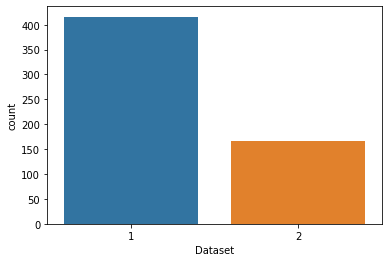

In [10]:
sns.countplot(data=data , x='Dataset' )

In [15]:
LD, NLD = data.Dataset.value_counts()
print('with Liver Disease: ', LD)
print('without Liver Disease: ',NLD)

with Liver Disease:  416
without Liver Disease:  167


Male Patients:  441
Female patients:  142


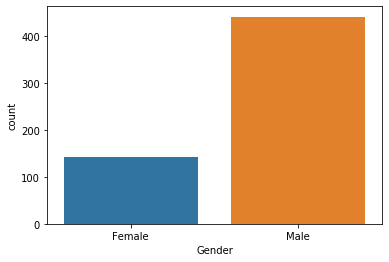

In [16]:
sns.countplot(data=data, x='Gender')
M, F = data.Gender.value_counts()
print("Male Patients: ", M)
print("Female patients: ", F)

C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


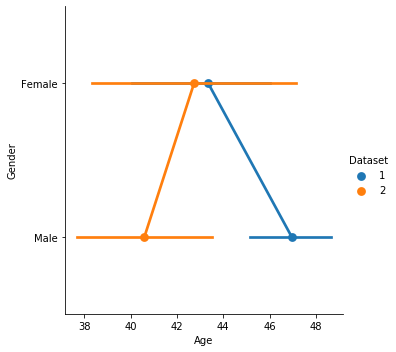

In [42]:
sns.factorplot(x='Age', y='Gender', data = data, hue = 'Dataset')



Age seems to be a factor for liver disease for both male and female genders


In [45]:
data[['Gender', 'Dataset', 'Age']].groupby(['Dataset','Gender']).count()

Age
Dataset Gender     
1       Female   92
        Male    324
2       Female   50
        Male    117

In [48]:
data[['Gender', 'Dataset', 'Age']].groupby(['Dataset','Gender']).mean()

Age
Dataset Gender           
1       Female  43.347826
        Male    46.950617
2       Female  42.740000
        Male    40.598291

Text(0.5, 0.98, 'Disease by Gender and Age')

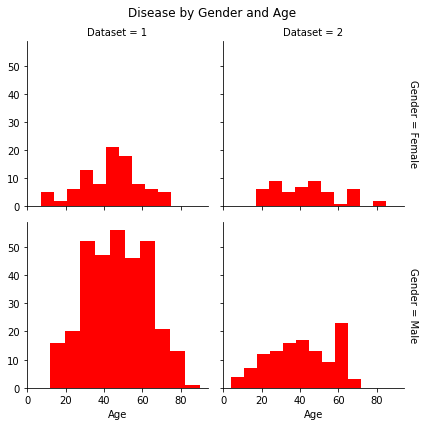

In [53]:
g = sns.FacetGrid(data, col = 'Dataset', row='Gender', margin_titles = True)
g.map(plt.hist, "Age", color='r')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age')

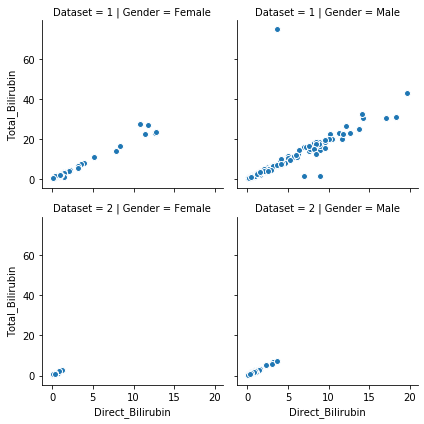

In [58]:
g = sns.FacetGrid(data, col='Gender', row = 'Dataset')
g.map(plt.scatter, "Direct_Bilirubin", "Total_Bilirubin", edgecolor='w')



There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature

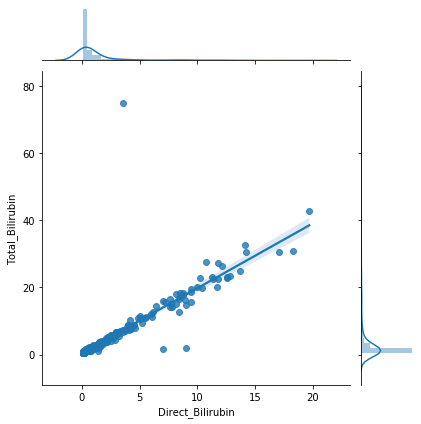

In [59]:
sns.jointplot("Direct_Bilirubin", "Total_Bilirubin", data=data, kind='reg')

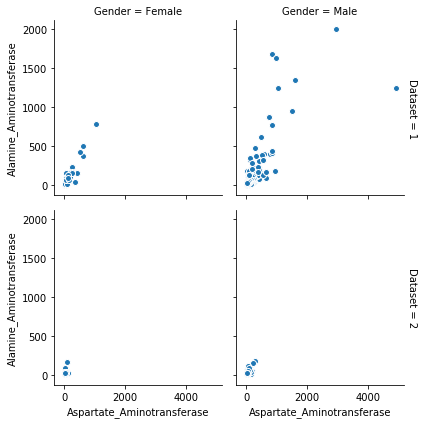

In [62]:
g = sns.FacetGrid(data, col = 'Gender', row = 'Dataset', margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase", edgecolor='w')

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

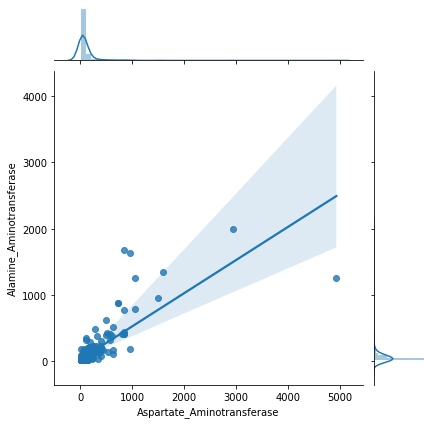

In [64]:
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=data, kind="reg")

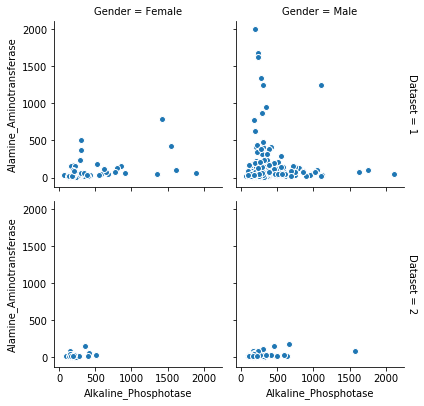

In [66]:


g = sns.FacetGrid(data, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)



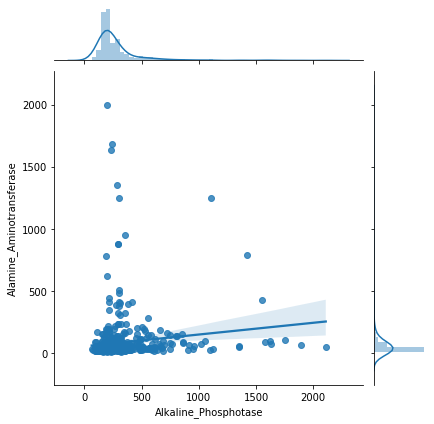

In [67]:


sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=data, kind="reg")



No linear correlation between Alkaline_Phosphotase and Alamine_Aminotransferase

C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


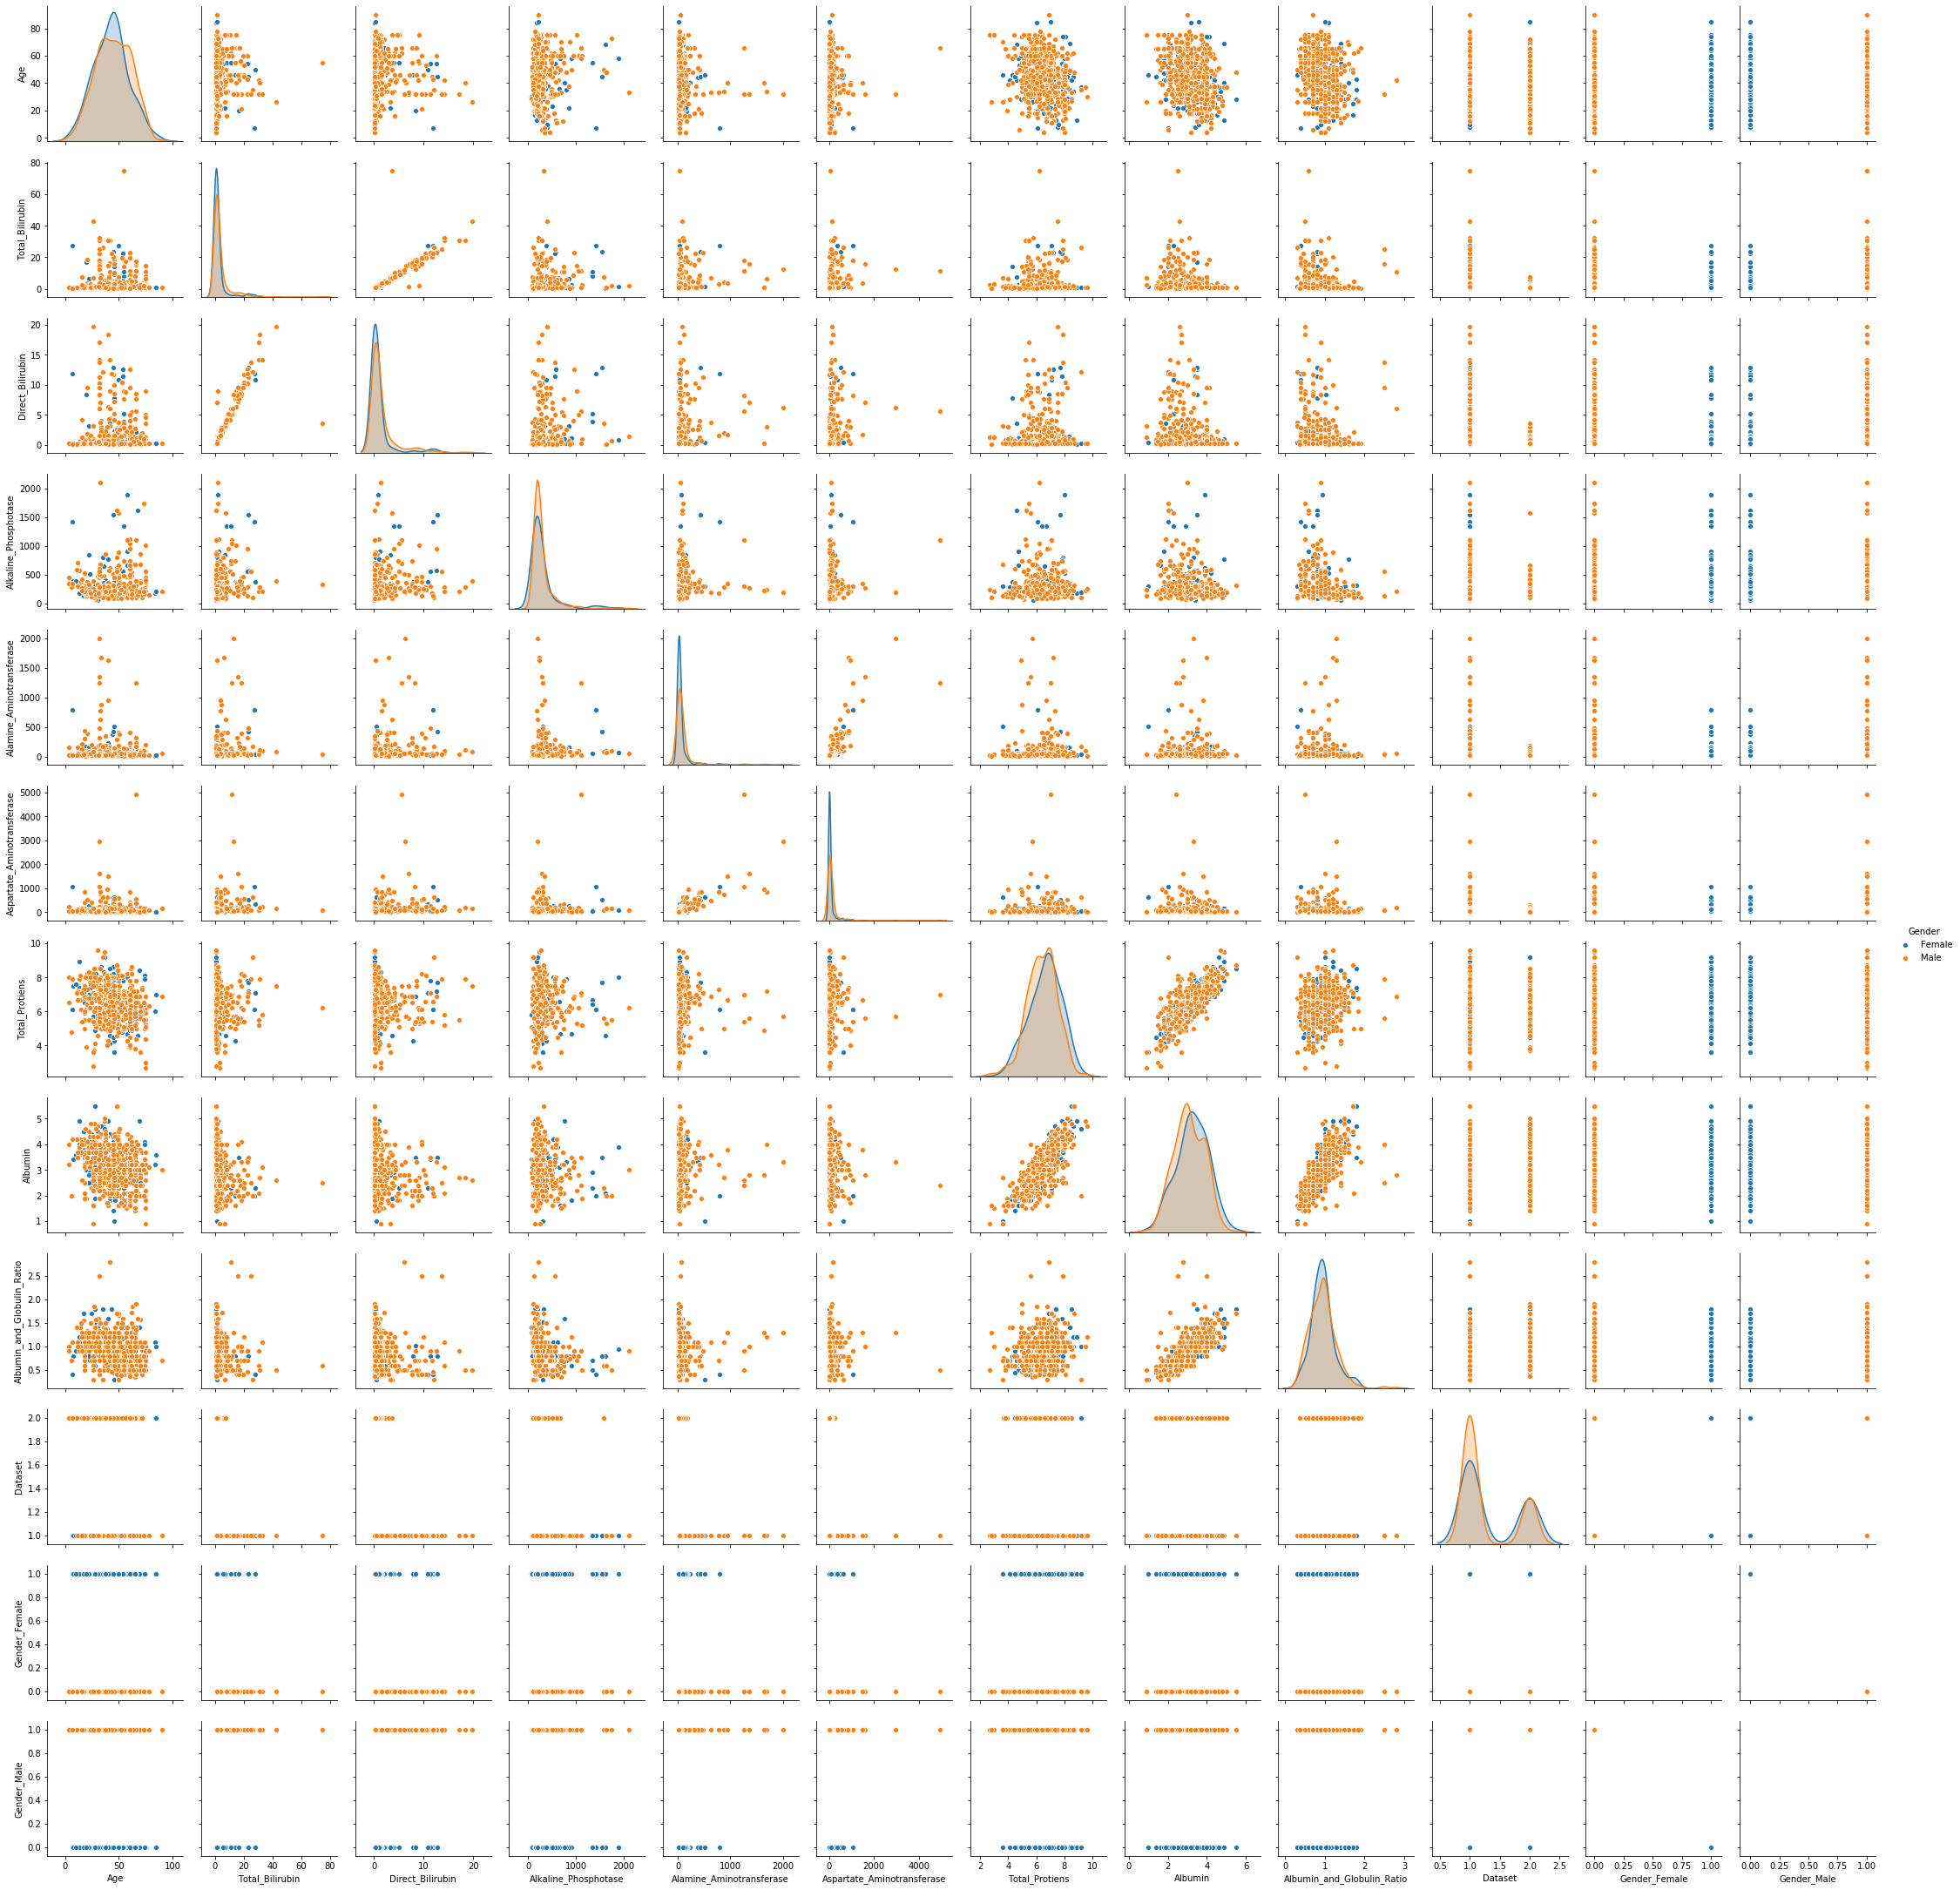

In [104]:
sns.pairplot(data, hue='Gender')

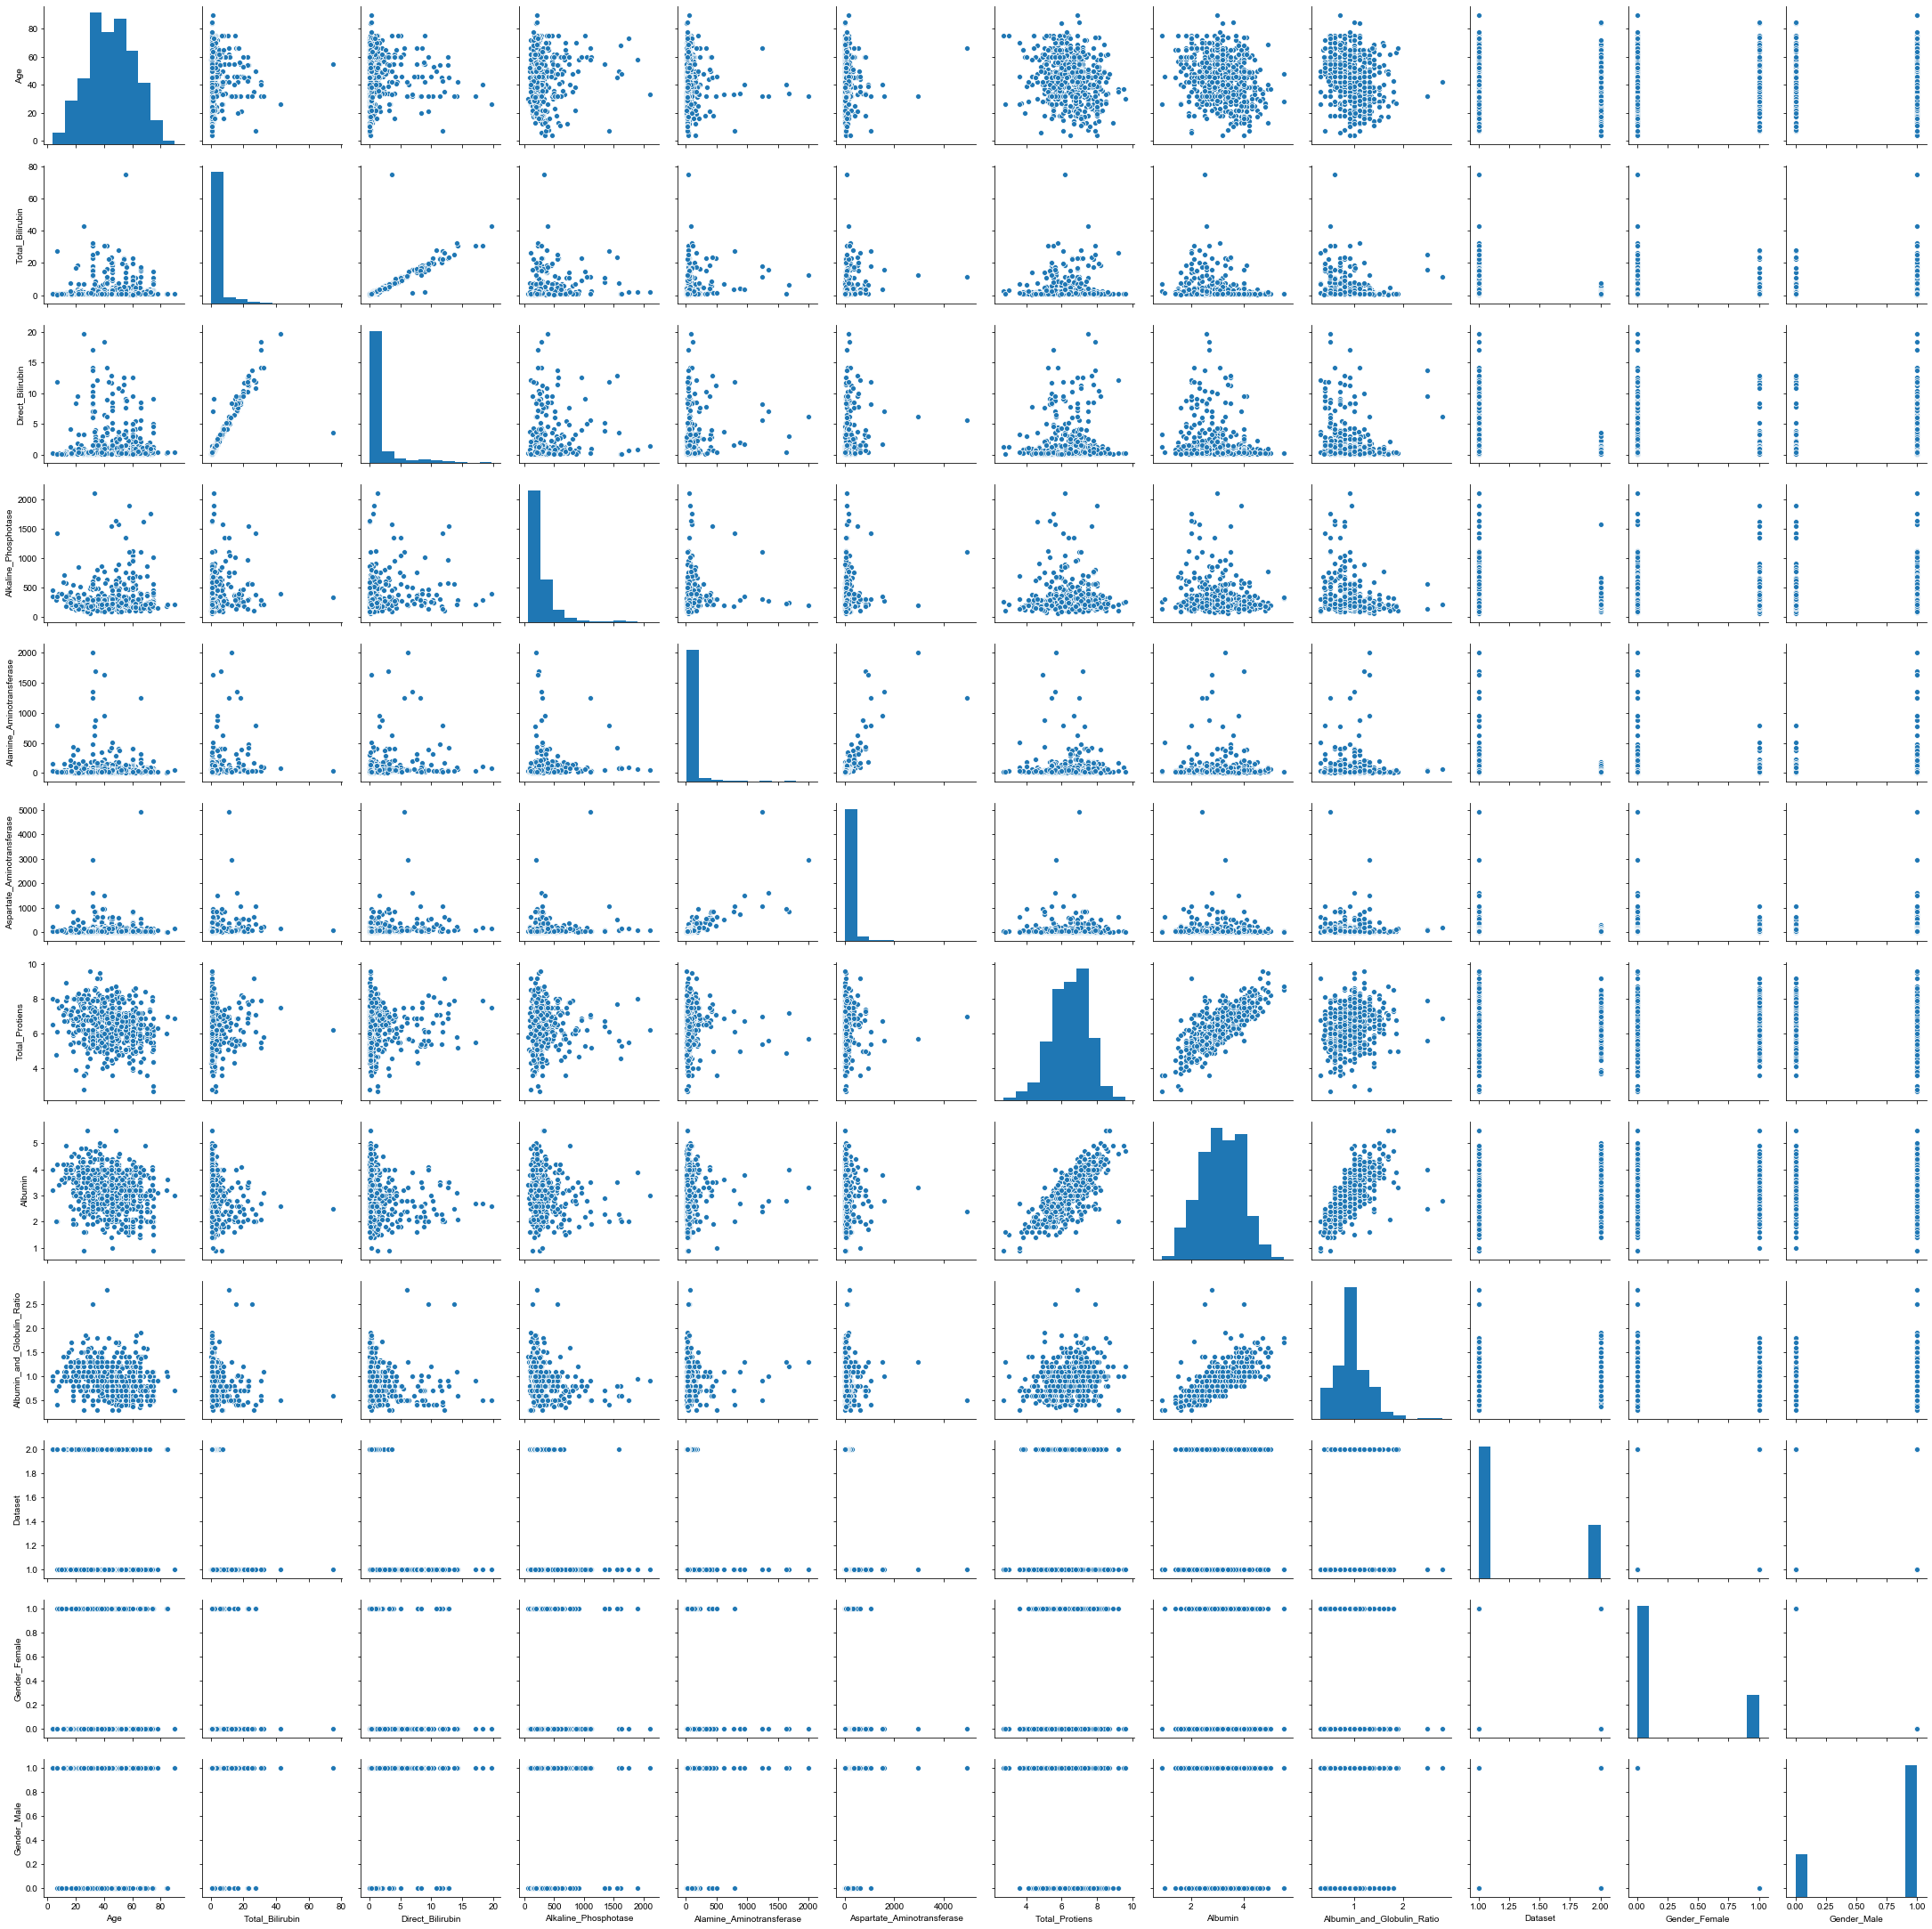

In [106]:
sns.pairplot(data)
sns.set_style('darkgrid')

From the above jointplots and scatterplots and pairplots we find direct relationship between the following features:

- Direct_Bilirubin & Total_Bilirubin
- Aspartate_Aminotransferase & Alamine_Aminotransferase
- Total_Protiens & Albumin
- Albumin_and_Globulin_Ratio & Albumin

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:

- Total_Bilirubin
- Alamine_Aminotransferase
- Total_Protiens
- Albumin_and_Globulin_Ratio
- Albumin


In [69]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1




Convert categorical variable "Gender" to indicator variables


In [70]:
pd.get_dummies(data['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [72]:
data = pd.concat([data, pd.get_dummies(data['Gender'], prefix='Gender') ], axis = 1)

In [73]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1


In [74]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449,0.243568,0.756432
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490,0.429603,0.429603
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000,0.000000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000,0.000000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000,0.000000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000,0.000000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000,1.000000,1.000000


In [77]:
data[data['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,1,0
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,0,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,1,0
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,0,1


In [78]:
data['Albumin_and_Globulin_Ratio'] = data.Albumin_and_Globulin_Ratio.fillna(data.Albumin_and_Globulin_Ratio.mean())

In [79]:
data['Albumin_and_Globulin_Ratio'].isnull().sum()

0

In [81]:


# The input variables/features are all the inputs except Dataset. 
# The prediction or label is 'Dataset' that determines whether the patient has liver disease or not. 
X = data.drop(['Gender','Dataset'], axis=1)
X.head(3)



,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1


In [82]:


y = data['Dataset'] # 1 for liver disease; 2 for no liver disease



In [83]:
liver_corr = X.corr()

In [84]:
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.056560,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.089291,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.100436,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,0.027496,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.082332,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.080336,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.089121,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.093799,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.003404,-0.003404
Gender_Female,-0.056560,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003404,1.000000,-1.000000


Text(0.5, 1, 'Correlation between features')

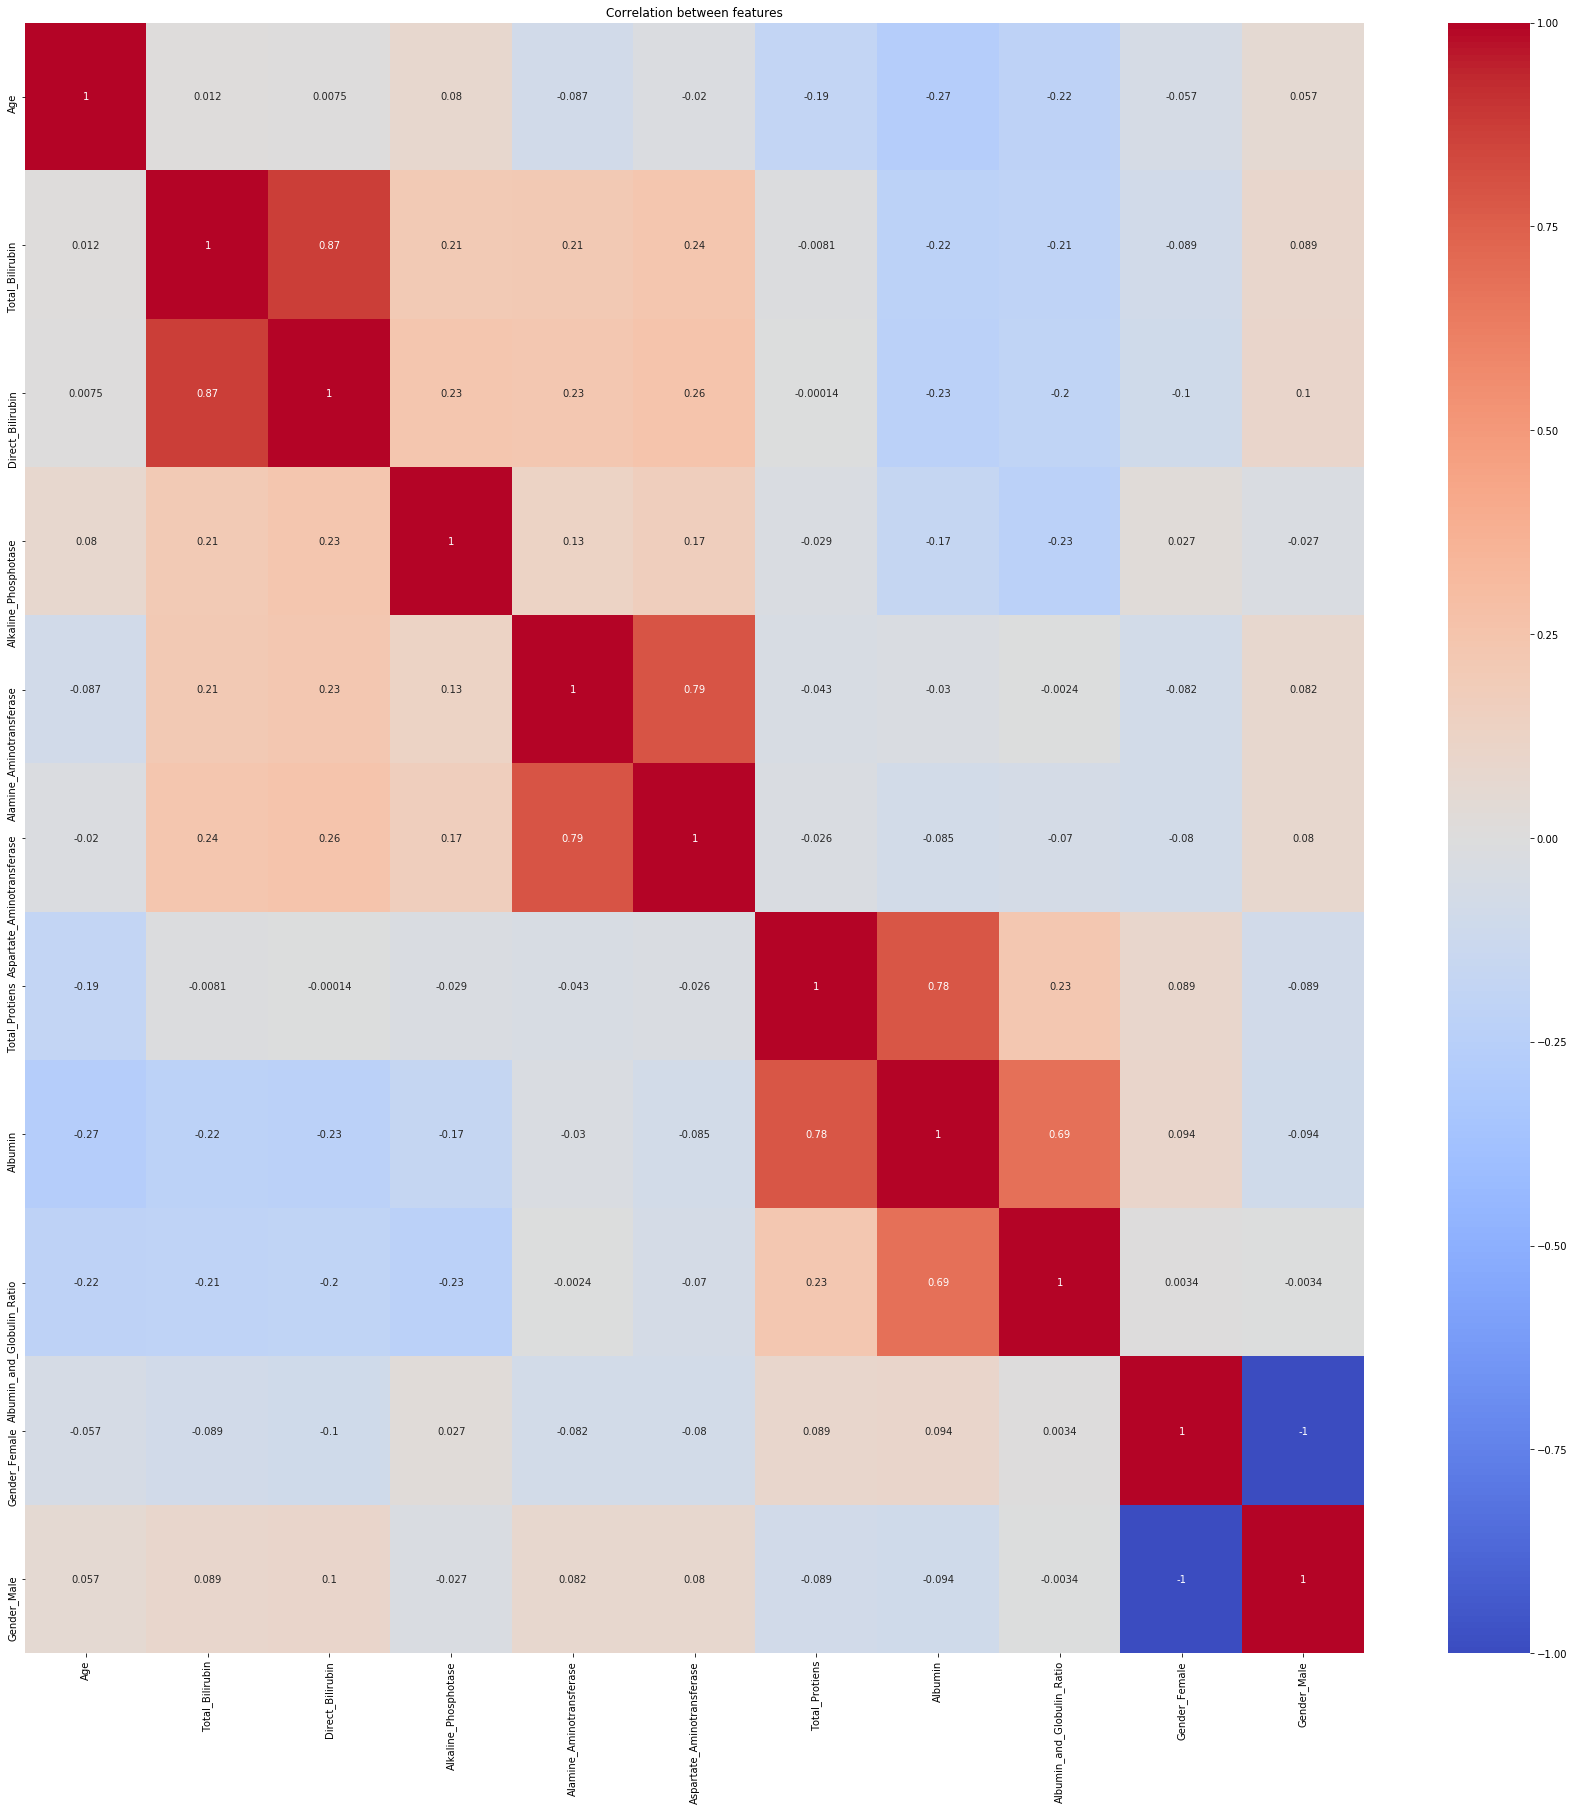

In [85]:
plt.figure(figsize = (30,30))
sns.heatmap(liver_corr, cbar=True, annot=True, cmap ='coolwarm')
plt.title('Correlation between features')

The above correlation also indicates the following correlation
 Total_Protiens & Albumin
Alamine_Aminotransferase & Aspartate_Aminotransferase
Direct_Bilirubin & Total_Bilirubin
There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

###### Machine Learning

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Perceptron, SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(408, 11)
(408,)
(175, 11)
(175,)


##### Logistic Regression

In [96]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

ypred = model.predict(X_test)

modelscore = round(model.score(X_train, y_train)*100, 2)
modelscore_test = round(model.score(X_test,y_test)*100,2)

print('Logistic Regression training score: \n:', modelscore)
print('Logistic Regression test score: \n', modelscore_test)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Accuracy: \n', accuracy_score(y_test, ypred))
print('Confusion matrix: \n', confusion_matrix(y_test, ypred))
print('Classification Report: \n', classification_report(y_test, ypred))


Logistic Regression training score: 
: 73.53
Logistic Regression test score: 
 66.86
Coefficient: 
 [[-0.01604646 -0.04197688 -0.45455783 -0.00112418 -0.01104347 -0.00315082
  -0.41214181  0.49575245  0.23056477  0.21154005 -0.03380048]]
Intercept: 
 [2.03975304]
Accuracy: 
 0.6685714285714286
Confusion matrix: 
 [[104  20]
 [ 38  13]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.84      0.78       124
           2       0.39      0.25      0.31        51

    accuracy                           0.67       175
   macro avg       0.56      0.55      0.55       175
weighted avg       0.63      0.67      0.64       175



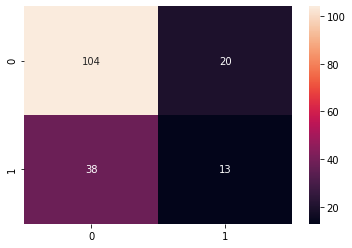

In [97]:
sns.heatmap(confusion_matrix(y_test, ypred), annot=True, fmt='d')

In [99]:
coeff_df = pd.DataFrame(X.columns)

coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])
pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,Albumin,0.495752
8,Albumin_and_Globulin_Ratio,0.230565
9,Gender_Female,0.211540
3,Alkaline_Phosphotase,-0.001124
5,Aspartate_Aminotransferase,-0.003151
4,Alamine_Aminotransferase,-0.011043
0,Age,-0.016046
10,Gender_Male,-0.033800
1,Total_Bilirubin,-0.041977
6,Total_Protiens,-0.412142


###### Gaussian Naive Bayes

In [100]:
model = GaussianNB()
model.fit(X_train, y_train)

ypred = model.predict(X_test)

gauss_score = round(model.score(X_train, y_train)*100, 2)
gauss_score_test = round(model.score(X_test, y_test)*100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)

print('Accuracy: \n', accuracy_score(y_test, ypred))
print(confusion_matrix(y_test,ypred))
print(classification_report(y_test,ypred))

Gaussian Score: 
 56.13
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[44 80]
 [ 2 49]]
              precision    recall  f1-score   support

           1       0.96      0.35      0.52       124
           2       0.38      0.96      0.54        51

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



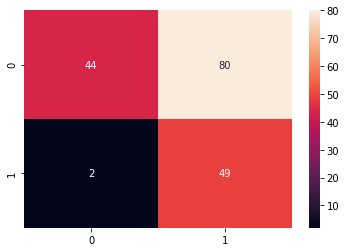

In [101]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt="d")

###### Random Forest

In [102]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 100.0
Random Forest Test Score: 
 66.86
Accuracy: 
 0.6685714285714286
[[100  24]
 [ 34  17]]
              precision    recall  f1-score   support

           1       0.75      0.81      0.78       124
           2       0.41      0.33      0.37        51

    accuracy                           0.67       175
   macro avg       0.58      0.57      0.57       175
weighted avg       0.65      0.67      0.66       175



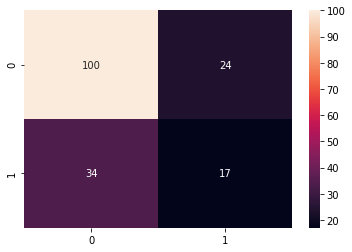

In [103]:
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

###### LinearSVC

In [117]:
model = LinearSVC(max_iter=10000)
model.fit(X_train, y_train)

ypred = model.predict(X_test)

modelscore = round(model.score(X_train, y_train)*100, 2)
modelscore_test = round(model.score(X_test,y_test)*100,2)

print('LinearSVC training score: \n:', modelscore)
print('LinearSVC test score: \n', modelscore_test)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Accuracy: \n', accuracy_score(y_test, ypred))
print('Confusion matrix: \n', confusion_matrix(y_test, ypred))
print('Classification Report: \n', classification_report(y_test, ypred))

from sklearn.metrics import f1_score

print('f1 score: ', f1_score(y_test, ypred, average='weighted', labels=np.unique(ypred)))

LinearSVC training score: 
: 71.57
LinearSVC test score: 
 69.14
Coefficient: 
 [[-0.0028439  -0.04438295 -0.09837478 -0.00274351 -0.0086388  -0.00247684
  -0.09650773  0.1227532   0.30489596  0.21883325  0.11305733]]
Intercept: 
 [0.33189058]
Accuracy: 
 0.6914285714285714
Confusion matrix: 
 [[120   4]
 [ 50   1]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.71      0.97      0.82       124
           2       0.20      0.02      0.04        51

    accuracy                           0.69       175
   macro avg       0.45      0.49      0.43       175
weighted avg       0.56      0.69      0.59       175

f1 score:  0.5888338192419825


C:\Users\achie\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
